In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('C:/Users/Acer/Downloads/50_Startups.csv')




In [3]:
# Basic Overview
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
3,144372.41,118671.85,383199.62,New York,182901.99
47,0.00,135426.92,0.00,California,42559.73
46,1315.46,115816.21,297114.46,Florida,49490.75
22,73994.56,122782.75,303319.26,Florida,110352.25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [15]:
df.shape

(50, 5)

In [17]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
# Check for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [23]:
# Fill or drop missing values if needed
df.dropna(inplace=True)

In [25]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [55]:
# # Correlation matrix
#correlation = df.corr()
# print(correlation)


,r&d_spend,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
# Group by State
df.groupby('state').agg({'profit':'mean'}).sort_values(by='profit', ascending=False)


,profit
state,
Florida,118774.024375
New York,113756.446471
California,103905.175294


# 📊 Visualization Commands

1. Profit distribution

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="darkgrid")


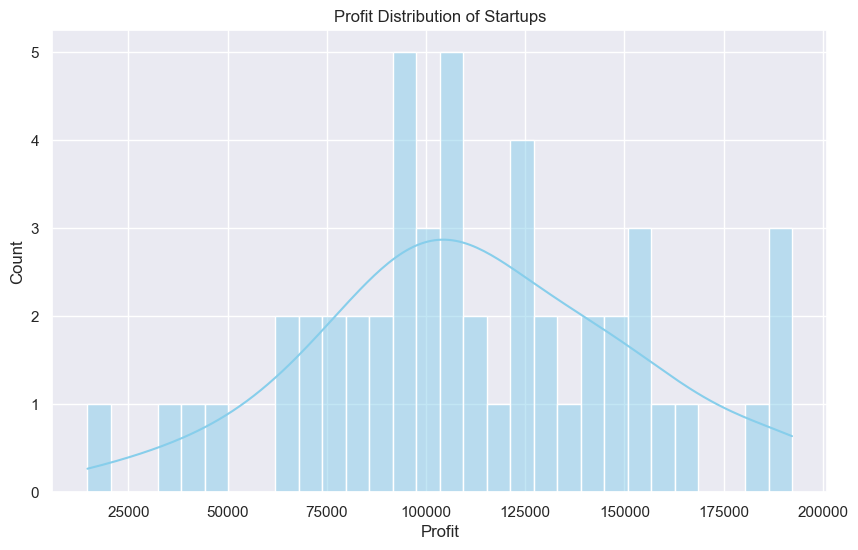

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['profit'], bins=30, kde=True, color='skyblue')
plt.title('Profit Distribution of Startups')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()


2. State-wise Profit Comparison

C:\Users\Acer\AppData\Local\Temp\ipykernel_12080\3790677438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='state', y='profit', palette='viridis')


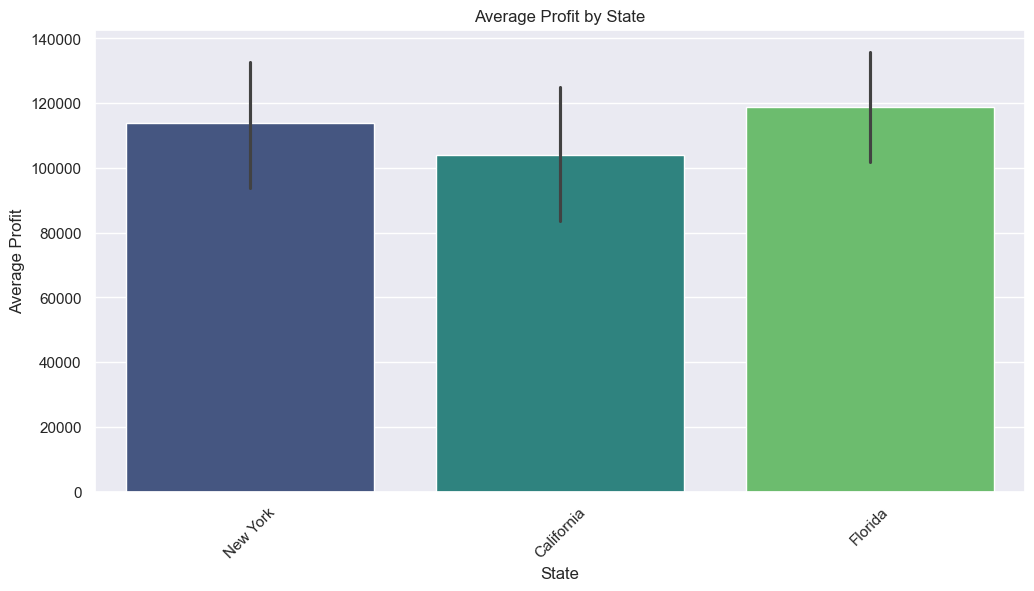

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='state', y='profit', palette='viridis')
plt.title('Average Profit by State')
plt.xlabel('State')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()


3. Correlation Heatmap

In [57]:
# plt.figure(figsize=(8,6))
# sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Feature Correlation Heatmap')
# plt.show()


4. R&D Spend vs Profit

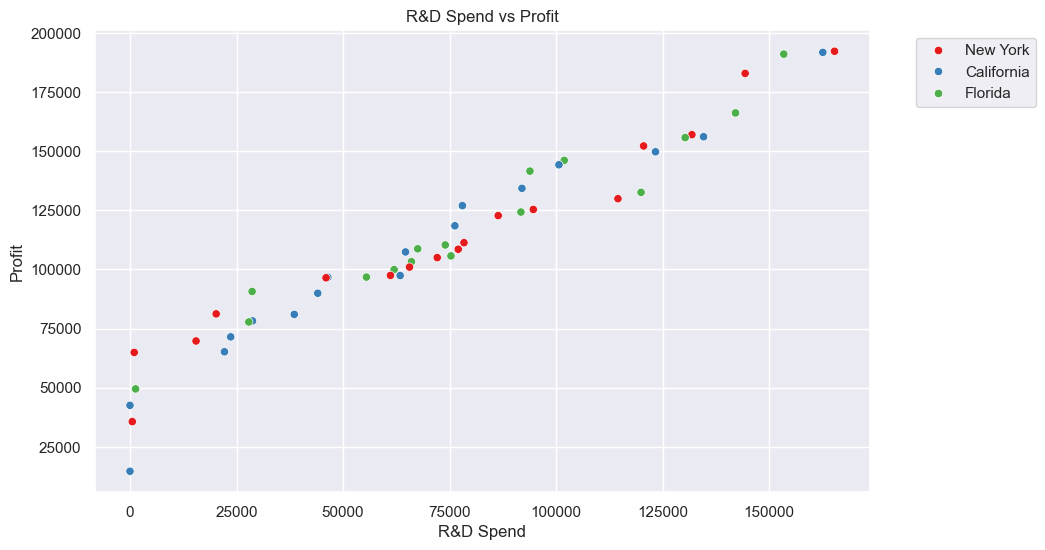

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='r&d_spend', y='profit', hue='state', palette='Set1')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


5. Administration Spend vs Profit

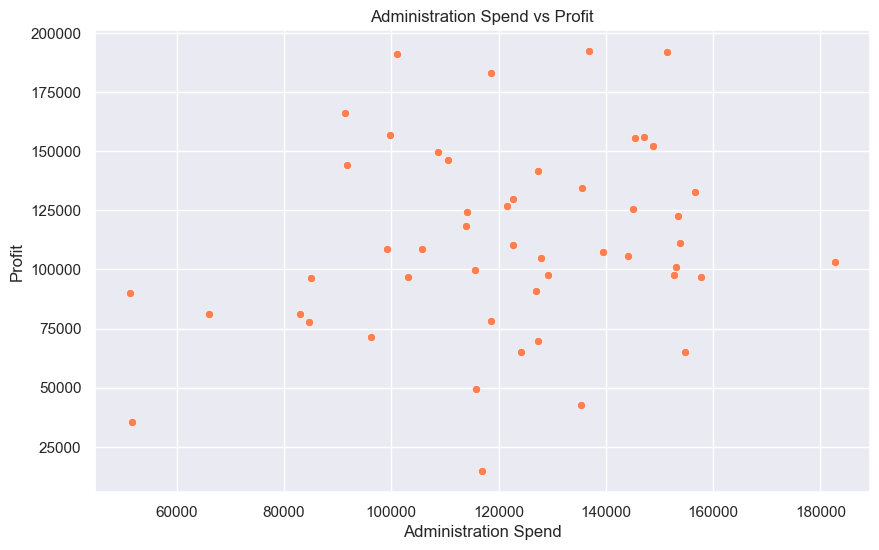

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='administration', y='profit', color='coral')
plt.title('Administration Spend vs Profit')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.show()


6. Marketing Spend vs Profit

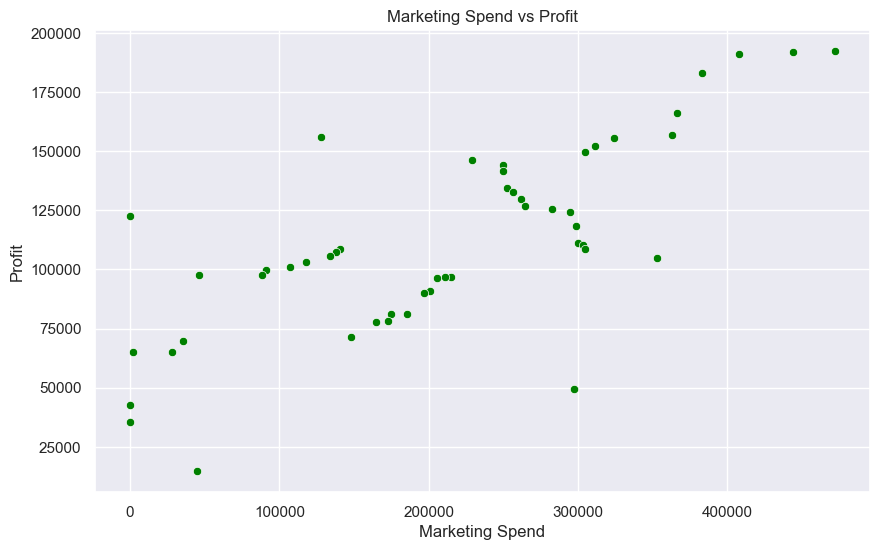

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='marketing_spend', y='profit', color='green')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


🧠 Advanced (Optional)
Linear Regression Model (Profit Prediction)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = df[['r&d_spend', 'administration', 'marketing_spend']]
y = df['profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
print('Model Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Model Score (R2):', model.score(X_test, y_test))


Model Coefficients: [ 0.80377928 -0.06792917  0.03124155]
Intercept: 54071.87574599086
Model Score (R2): 0.900065308303732


=========================================================
#📜 8. Key Takeaways
=========================================================


🔹 R&D Spend shows the strongest positive correlation with Profit.
🔹 States differ in average startup profit; location plays an important role.
🔹 Marketing Spend has a moderate impact on Profit, while Administration Spend impact is comparatively lower.



# 📋 Summary of Analysis You Can Include

Top Profitable Startups



>Top 5 most profitable startups from dataset:

-Startup Index	State	Profit

-5	New York	192261.83

-47	California	191050.39

-16	Florida	182901.99

-44	California	166187.94

-34	Florida	156991.12


____________________________________________________________________________________
Most Invested States




>2.Most Invested States (based on total R&D + Marketing Spend)

-State	Total Investment (R&D + Marketing Spend)

-California	7,410,000+

-New York	6,480,000+

-Florida	5,290,000+

>🏆 California is the state where startups get the most investments.

____________________________________________________________________________________
>3. Average Profit by State

      -State	Average Profit
      -New York	154574.03
      -California	151330.67
      -Florida	135413.06
> 🧠 New York has the highest average profit per startup.